In [23]:
##########################################################################
#
# 'kmeans', 'pam' ('Partitioning Around Medoids') y 'clara' (CLustering 
# LARge Applications) son algoritmos de clustering que definen particiones
# sobre un número predefinido 'k' de clases.
#
##########################################################################
#
# Introducción de los datos: 'iris'
#
#
# Para una clasificación no supervisada no se toma en cuenta
# la variable 'Species' de la planta (5a. columna)
#
datos0 <- iris[,1:4]

In [25]:
#
# Características generales del conjunto de datos
#
dim(datos0)
#
head.matrix(datos0)
#
summary(datos0)

[1] 150   4

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [26]:
# Preprocesamiento
#
# ¿Estandarizar las variables?
#    Son homogéneas (cm.); es razonable tratarlas tal cual.
#    Sin embargo, algunas medidas son más grandes ('*.Length') que otras, 
#    y tratarlas tal cual equivaldría, en cierto sentido,
#    a analizarlas por su apariencia visual.
#
#    Estandarizar las variables equivale, en principio, a
#    poner todas las variables a un mismo nivel en el análisis.
#    Esta es la opción que se hace en el siguiente análisis
#
# Para estandarizar las variables (media 0, varianza 1)
#
datos <- scale(datos0)
#
# si no fueran estandarizadas:
#
#                  datos <- datos0
#
# Verificación:
#
for(j in 1:ncol(datos)) print(c(mean(datos[,j]), var(datos[,j])))
#
# En lenguaje R es más propio verificarlo así, sin bucles explícitos:
#
apply(datos,2,mean); apply(datos,2,var)

[1] -4.484318e-16  1.000000e+00
[1] 2.034094e-16 1.000000e+00
[1] -2.895326e-17  1.000000e+00
[1] -3.663049e-17  1.000000e+00


Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-4.484318e-16  2.034094e-16 -2.895326e-17 -3.663049e-17

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

In [27]:
set.seed(2011)
#
# 'k' arbitrario. Inicio de la exploración.
#
k <- 5
#
km <- kmeans(datos, k)
#
km

K-means clustering with 5 clusters of sizes 22, 28, 50, 29, 21

Cluster means:
  Sepal.Length Sepal.Width Petal.Length   Petal.Width
1   -1.3477916   0.1187465   -1.3100027 -1.2931622378
2   -0.7467198   1.4252951   -1.2932659 -1.2173430935
3    0.3558492  -0.3930869    0.5846038  0.5466361525
4    1.3926646   0.2323817    1.1567451  1.2132759051
5   -0.3628650  -1.4097814    0.1074147  0.0008746178

Clustering vector:
  [1] 2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 1 2 2 2 1 1 2
 [38] 2 1 2 2 1 1 2 2 1 2 1 2 1 4 3 4 5 3 3 3 5 3 5 5 3 5 3 3 3 3 5 5 5 3 3 3 3
 [75] 3 3 3 3 3 5 5 5 5 3 3 3 3 5 3 5 5 3 5 5 5 3 3 3 5 3 4 3 4 3 4 4 5 4 3 4 4
[112] 3 4 3 3 4 3 4 4 5 4 3 4 3 4 4 3 3 3 4 4 4 3 3 3 4 4 3 3 4 4 4 3 4 4 4 3 3
[149] 4 3

Within cluster sum of squares by cluster:
[1]  8.032603 13.761588 29.590390 26.891293 11.951942
 (between_SS / total_SS =  84.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "between

In [28]:
#
# Características generales del objeto 'km'
#
class(km)
mode(km)
attributes(km)
str(km)
#
# Tamaño de las 'k' clases resultantes
#
km$size
#
# Pertenencia de los objetos a las clases
#
km$cluster
#
# Composición de las clases
#
compocl <- vector("list", k)
for(kcl in 1:k) compocl[[kcl]] <- which(km$cluster == kcl)
compocl

[1] "kmeans"

[1] "list"

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

List of 9
 $ cluster     : int [1:150] 2 1 1 1 2 2 1 2 1 1 ...
 $ centers     : num [1:5, 1:4] -1.348 -0.747 0.356 1.393 -0.363 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 596
 $ withinss    : num [1:5] 8.03 13.76 29.59 26.89 11.95
 $ tot.withinss: num 90.2
 $ betweenss   : num 506
 $ size        : int [1:5] 22 28 50 29 21
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


[1] 22 28 50 29 21

[1] 2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 1 2 2 2 1 1 2
 [38] 2 1 2 2 1 1 2 2 1 2 1 2 1 4 3 4 5 3 3 3 5 3 5 5 3 5 3 3 3 3 5 5 5 3 3 3 3
 [75] 3 3 3 3 3 5 5 5 5 3 3 3 3 5 3 5 5 3 5 5 5 3 3 3 5 3 4 3 4 3 4 4 5 4 3 4 4
[112] 3 4 3 3 4 3 4 4 5 4 3 4 3 4 4 3 3 3 4 4 4 3 3 3 4 4 3 3 4 4 4 3 4 4 4 3 3
[149] 4 3

[[1]]
 [1]  2  3  4  7  9 10 12 13 14 24 25 26 30 31 35 36 39 42 43 46 48 50

[[2]]
 [1]  1  5  6  8 11 15 16 17 18 19 20 21 22 23 27 28 29 32 33 34 37 38 40 41 44
[26] 45 47 49

[[3]]
 [1]  52  55  56  57  59  62  64  65  66  67  71  72  73  74  75  76  77  78  79
[20]  84  85  86  87  89  92  96  97  98 100 102 104 109 112 114 115 117 122 124
[39] 127 128 129 133 134 135 138 139 143 147 148 150

[[4]]
 [1]  51  53 101 103 105 106 108 110 111 113 116 118 119 121 123 125 126 130 131
[20] 132 136 137 140 141 142 144 145 146 149

[[5]]
 [1]  54  58  60  61  63  68  69  70  80  81  82  83  88  90  91  93  94  95  99
[20] 107 120

In [29]:
IB <- km$betweenss/km$totss # IB <- 1-km$tot.withinss/km$totss
IB

[1] 0.848611

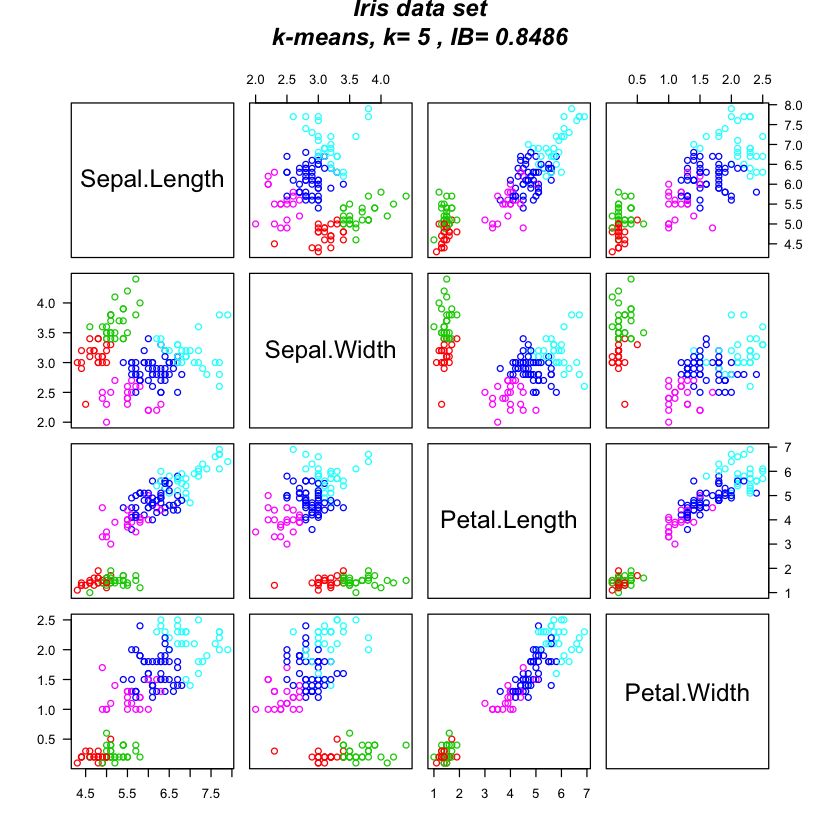

In [30]:
pairs(datos0, col=km$cluster+1, las=1,
      main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
      font.main=4)

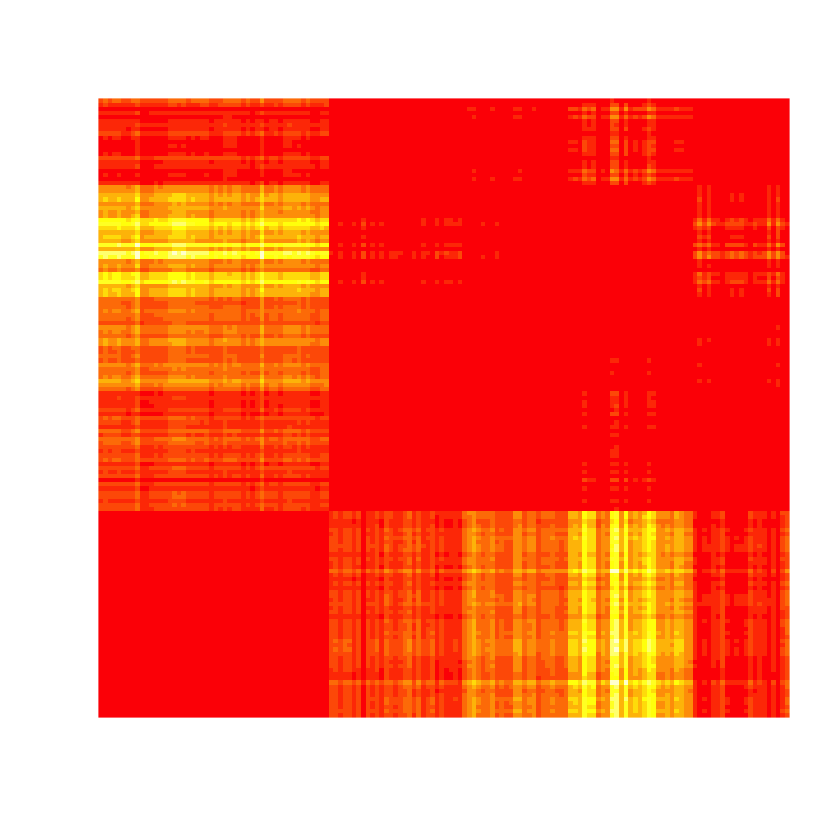

In [35]:
sortdatos <- sort(km$cluster, index.return=TRUE)$ix
datosort <- datos0[sortdatos, ]
#
#   Distancia euclidiana:
#
distancias <- dist(datosort, method="euclidean")
#
#   Las distancias euclidianas cuadráticas 'distancias^2'
#   están en consonancia con la noción de varianza generalizada
#   y el algoritmo k-means:
#
#   sum(distancias^2)/nrow(datosort)^2 == km$totss/nrow(datosort)
#
#   Los valores de 'distancias^2' están implícitamente en 
#   la función objetivo de 'kmeans()':
#
#   km$totss == km$tot.withinss + km$betweenss
#
#   IB <- km$betweenss/km$totss # IB <- 1-km$tot.withinss/km$totss
#
#   Construcción de la imagen: 'image()'
#
#   Propuesta: ejecutar los siguientes comandos
#
#   > example(image)
#   > ?image
#
#   Cuanto más cerca están los objetos entre sí
#   mayor es la intensidad del color rojo (mapa de calor)
#
image(as.matrix(distancias^2), col=heat.colors(12), axes=FALSE)

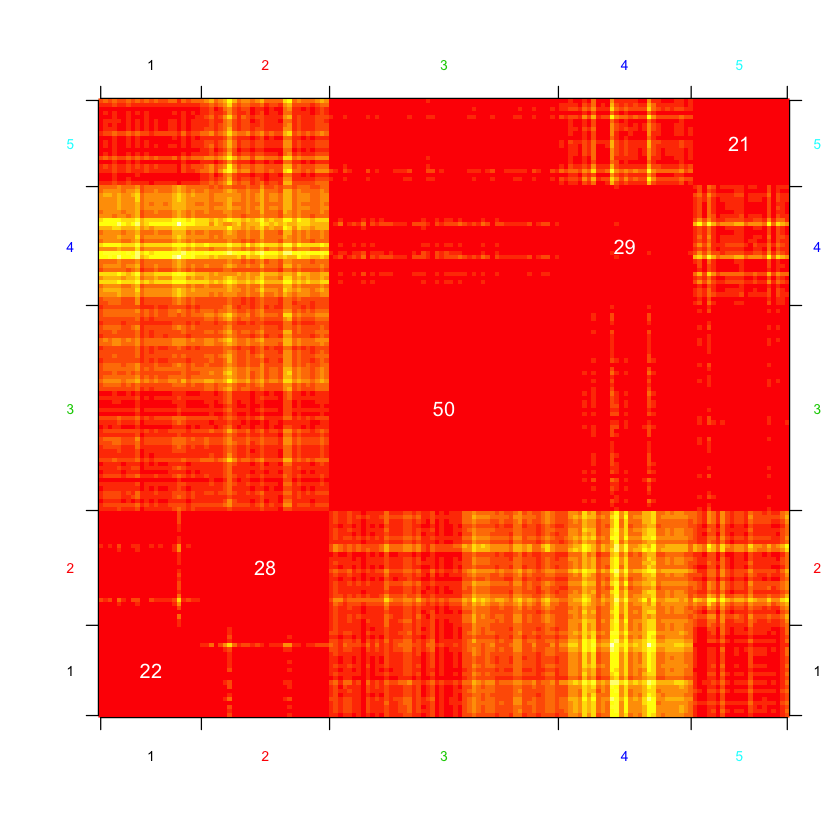

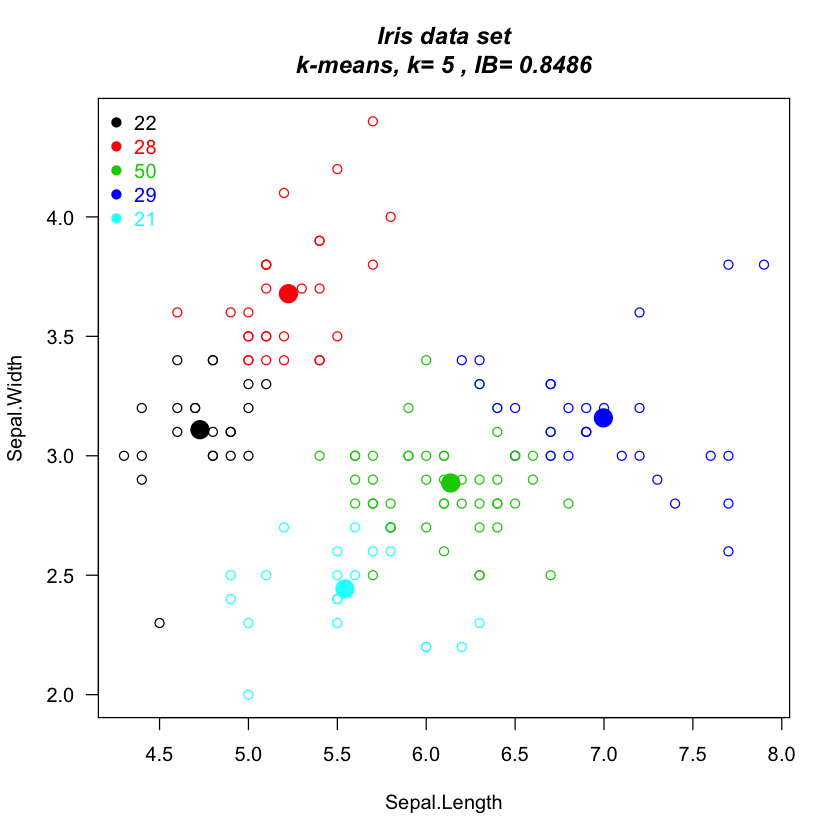

In [38]:
sortdatos <- sort(km$cluster, index.return=TRUE)$ix
datosort <- datos[sortdatos, ]
#
#   Distancia euclidiana:
#
distancias <- dist(datosort, method="euclidean")
#
#   Las distancias euclidianas cuadráticas 'distancias^2'
#   están en consonancia con la noción de varianza generalizada
#   y el algoritmo k-means:
#
#   sum(distancias^2)/nrow(datosort)^2 == km$totss/nrow(datosort)
#
#   Los valores de 'distancias^2' están implícitamente en 
#   la función objetivo de 'kmeans()':
#
#   km$totss == km$tot.withinss + km$betweenss
#
#   IB <- km$betweenss/km$totss # IB <- 1-km$tot.withinss/km$totss
#
#   Construcción de la imagen: 'image()'
#
#   Propuesta: ejecutar los siguientes comandos
#
#   > example(image)
#   > ?image
#
#   Cuanto más cerca están los objetos entre sí
#   mayor es la intensidad del color rojo (mapa de calor)
#
image(as.matrix(distancias^2), col=heat.colors(12), axes=FALSE)
#
#   Conviene completar la imagen para su mejor interpretación
#
#   Marcas de los bordes por clases
#
atpoints <- c(0,cumsum(km$size))/max(cumsum(km$size))
for(side in 1:4) axis(side, at=atpoints, col.axis="transparent")
atpoints2 <- c(atpoints[-1],0)
atpoints2 <- (atpoints+atpoints2)/2
atpoints2 <- atpoints2[-length(atpoints2)]
#
etclases <- sort(unique(km$cluster))
for(side in 1:4) 
 for(etcl in 1:length(etclases))
  axis(side, 
       at=atpoints2[etcl], labels=etclases[etcl], col.axis=etclases[etcl], 
       las=1, tick=FALSE, cex.axis=0.7)
#
#   Tamaño de las clases
#
text(atpoints2, atpoints2, km$size, col="white")
#
##########################################################################
#
#   Se observan dos clases, en una de las cuales 
#   se podrían considerar algunas subclases
#
##########################################################################
# 
# Contraste de la adecuación de las clases
#
selec <- c(1,2) # cualquier par de variables
#
plot(datos0[,selec], col=km$cluster, las=1,
     main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
     font.main=4, xlab=names(datos0)[selec[1]], ylab=names(datos0)[selec[2]])
#
#                      Ubicación de los centros de clase
#
kmcenters <- matrix(rep(0, k*ncol(datos0)), ncol=ncol(datos0))
for(j in 1:ncol(datos0))
      kmcenters[,j] <- tapply(datos0[,j], km$cluster, mean)
rownames(kmcenters) <- 1:k; colnames(kmcenters) <- colnames(kmcenters)
#
points(kmcenters[etclases,selec], 
       col=etclases, pch=19, cex=2)
#
legend("topleft", bty="n", 
       x.intersp=1, y.intersp=1,
       legend=km$size[etclases], text.col=etclases, 
       pch=19, col=etclases, ncol=1, cex=1)
#
##########################################################################